In [34]:
import tensorflow as tf
from tensorflow import keras
from os import path, getcwd, chdir

In [35]:
path = f"{getcwd()}/../tmp2/mnist.npz"

In [36]:
class Mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self , epoch , logs={}):
        if(logs.get('acc') > 0.99):
            print("Reached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [37]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (2,2), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128 , tf.nn.relu),
    keras.layers.Dense(10 , tf.nn.softmax)
])
model.compile(tf.optimizers.Adam() , loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images , training_labels , epochs=1)
test_loss = model.evaluate(test_images , test_labels)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 27, 27, 64)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

KeyboardInterrupt: 

In [38]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


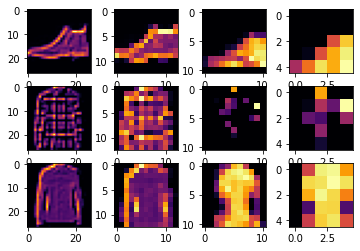

In [39]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4) #plotting 3 rows 4 columns
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26 #analysis of shoes
CONVOLUTION_NUMBER = 3
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)